In [2]:
import pandas as pd

Let's import the csv file 

source: https://www.kaggle.com/datasets/yasserh/titanic-dataset?resource=download 

In [3]:
df = pd.read_csv('/Users/Asus/Classe16/Boolean/Porfolios/titanic_passengers_analysis/Data/Titanic-Dataset.csv')

Here is the dataframe with data present in the dataset

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pandas automatically adds a default index column (the first one). Since the titanic_dataset.csv already contains PassengerId which serves as a suitable index, we can export the database as follows:

In [5]:
df = pd.read_csv('/Users/Asus/Classe16/Boolean/Porfolios/titanic_passengers_analysis/Data/Titanic-Dataset.csv', 
                 index_col="PassengerId")

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
      dtype='int64', name='PassengerId', length=891)

In [8]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.shape

(891, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Running df.info() shows the 'Name', 'Sex', 'Ticket', 'Cabin', and 'Embarked' columns are currently the generic object type. To improve performance, ensure type safety, and achieve consistent missing value handling, we should assign these text columns the dedicated string dtype during the read phase using the dtype parameter:

In [11]:
df = pd.read_csv('/Users/Asus/Classe16/Boolean/Porfolios/titanic_passengers_analysis/Data/Titanic-Dataset.csv', 
                 index_col="PassengerId",
                 dtype={'Name': pd.StringDtype(), 'Sex': pd.StringDtype(), 'Ticket': pd.StringDtype(),
                        'Cabin': pd.StringDtype(), 'Embarked': pd.StringDtype()})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    string 
 3   Sex       891 non-null    string 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    string 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    string 
 10  Embarked  889 non-null    string 
dtypes: float64(2), int64(4), string(5)
memory usage: 83.5 KB


Let's now examine some descriptive statistics to gain insight into the passengers' details, such as the age of the oldest passenger or the most expensive ticket price.

In [13]:
df.max()

/var/folders/xv/pwx4n4zd0nn545t0k6s1p__c0000gn/T/ipykernel_9108/1151452817.py:1: FutureWarning: <class 'pandas.core.arrays.string_.StringArray'>._reduce will require a `keepdims` parameter in the future
  df.max()


Survived                              1
Pclass                                3
Name        van Melkebeke, Mr. Philemon
Sex                                male
Age                                80.0
SibSp                                 8
Parch                                 6
Ticket                        WE/P 5735
Fare                           512.3292
Cabin                                 T
Embarked                              S
dtype: object

The Fare is in GBP. The most expensive ticket is £512 that seems low for a suit on the transatlantic, but £500 in the early 1900s was worth almost £80K today.

We will analyze whether this passenger, who paid a premium fare, ultimately survived when we examine the survival data later in our analysis.

In [14]:
df.min()

/var/folders/xv/pwx4n4zd0nn545t0k6s1p__c0000gn/T/ipykernel_9108/3962516015.py:1: FutureWarning: <class 'pandas.core.arrays.string_.StringArray'>._reduce will require a `keepdims` parameter in the future
  df.min()


Survived                      0
Pclass                        1
Name        Abbing, Mr. Anthony
Sex                      female
Age                        0.42
SibSp                         0
Parch                         0
Ticket                   110152
Fare                        0.0
Cabin                       A10
Embarked                      C
dtype: object

Let's check now the total Ticket Fare:

In [15]:
df.sum(numeric_only=True).round(0)

Survived      342.0
Pclass       2057.0
Age         21205.0
SibSp         466.0
Parch         340.0
Fare        28694.0
dtype: float64

The total revenue was almost £30k, equivalent to £3.5M today.

Let's check now the average values:

In [16]:
df.mean(numeric_only=True).round(2)

Survived     0.38
Pclass       2.31
Age         29.70
SibSp        0.52
Parch        0.38
Fare        32.20
dtype: float64

The majority of passengers traveled in second or third class, and these groups experienced significantly lower survival rates (38%).

To see other stats values let's use .describe

In [17]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


let's order now the raws to understand for example who are the passengers who have bought the most expensive tickets

In [19]:
df.sort_values("Fare", ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,<NA>,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...
634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,<NA>,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,<NA>,S
823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,<NA>,S


I passeggere che hanno acquistato i biglietti, ovviamente viaggiando in prima classe sono quasi tutti soppravvissuti, sarà che il prezzo pagato abbia inciso sostanzialmente sul tazzo di soppravvivenza. Also some passeggengers traveld for free even it was the first class. Watson, Mr. Ennis Hastings era un supervisore incaricato sul vigilare sul regolare svolgimento del viaggio.  

let's order the db by the age

In [25]:
df.dropna(subset='Age').sort_values('Age', ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S
852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,<NA>,S
494,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,<NA>,C
97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,<NA>,Q
...,...,...,...,...,...,...,...,...,...,...,...
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,<NA>,S
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,<NA>,C
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,<NA>,C


<Axes: ylabel='Frequency'>

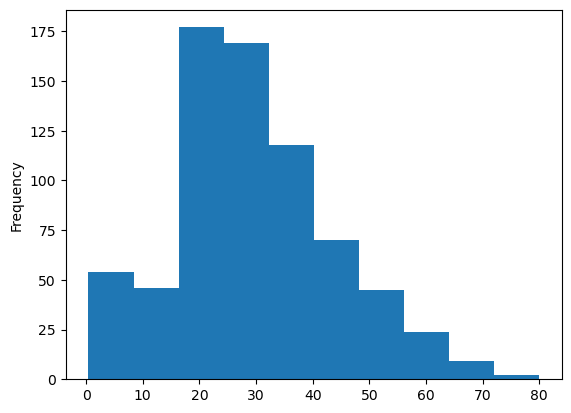

In [28]:
df['Age'].plot(kind='hist')

Most of the people were about 20/30s. Let's use .values_counts to understand it better 

In [30]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [31]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Most of the people were traving in third class. 

<Axes: ylabel='count'>

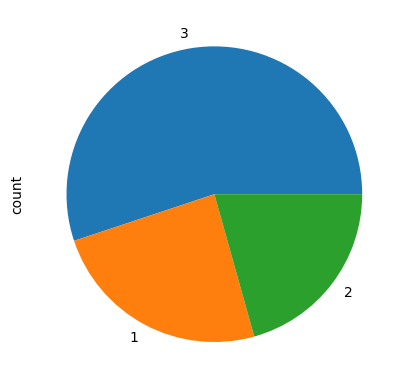

In [32]:
df['Pclass'].value_counts().plot(kind="pie")

In [34]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Most of the people didn't survive (0)

<Axes: ylabel='count'>

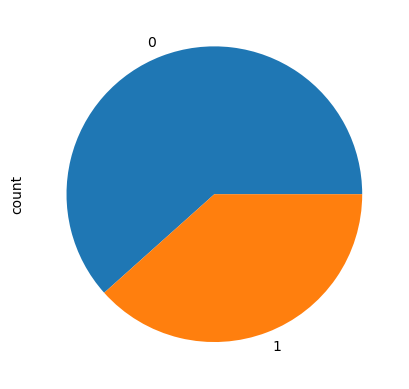

In [33]:
df['Survived'].value_counts().plot(kind='pie')

Did the class influenced the survived number?

In [37]:
df.groupby('Pclass')['Survived'].mean().round(2)

Pclass
1    0.63
2    0.47
3    0.24
Name: Survived, dtype: float64

it seems like the class influenced the survive rate 

<Axes: xlabel='Pclass'>

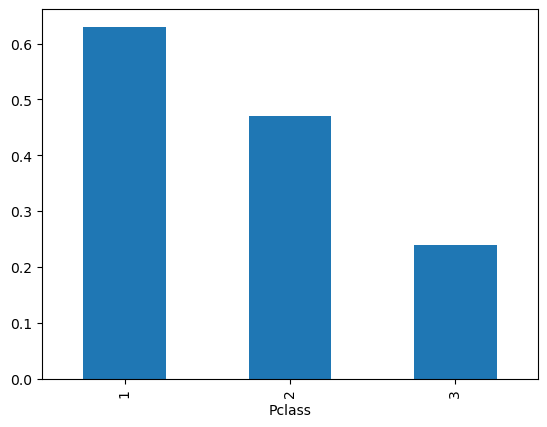

In [38]:
df.groupby('Pclass')['Survived'].mean().round(2).plot(kind='bar')

Let's see now for the sex

<Axes: xlabel='Sex'>

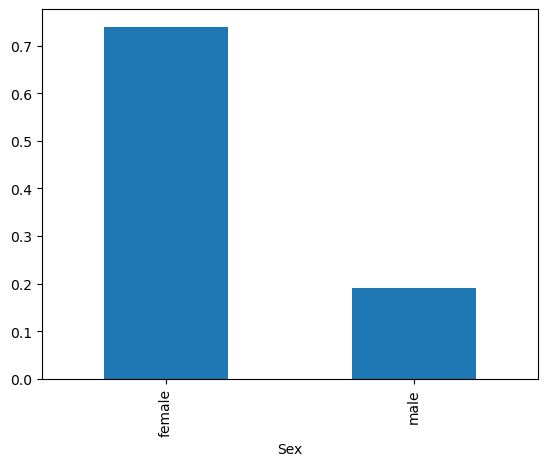

In [40]:
df.groupby('Sex')['Survived'].mean().round(2).plot(kind='bar')

the first people to be evaquated have been women and chidren

Let's see now the oldest passenger 

In [47]:
df[df['Age'] > 70].sort_values('Age', ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,<NA>,S
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,<NA>,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,<NA>,Q
